# Practice Exercise Linear Regression

## We will be using the Boston house price dataset for this exercise.
#### This dataset is in-built in Python in the Sci-kit learn library. But for this exercise, we have already downloaded this dataset in the form of a csv file.

**Importing Libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from math import sqrt


**Load the dataset**

In [21]:
path = "Boston.csv"
df = pd.read_csv(path)

**Check the data description**

In [22]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


**Check the shape of the dataset**

In [23]:

shape_info = {"rows": [df.shape[0]], "columns": [df.shape[1]]}
shape_df = pd.DataFrame(shape_info)
shape_df

,rows,columns
0,506,14


**Get the info data types column wise**

In [24]:
dtypes_df = pd.DataFrame(df.dtypes, columns=["dtype"]).reset_index()
dtypes_df.columns = ["column", "dtype"]

**Get the summary statistics of the dataset**

In [25]:
desc_df = df.describe().T
desc_df

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Get the Correlation Heatmap**

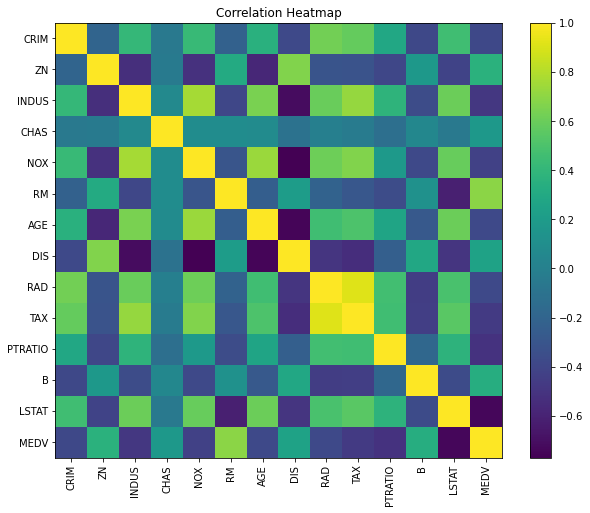

In [29]:
corr = df.corr()
plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)
plt.title("Correlation Heatmap")
plt.show()


**Split the dataset**

In [30]:

X = df.drop(columns=["MEDV"])
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape

((354, 13), (152, 13))

## Using Statsmodels OLS

**Make the linear model using OLS**

In [31]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Vishal\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Get the value of coefficient of determination**

In [32]:
r2_train_sm = ols_model.rsquared

**Get the Predictions on test set**

In [36]:
X_test_sm = sm.add_constant(X_test, has_constant='add')
y_pred_test_sm = ols_model.predict(X_test_sm)

# Also get predictions for training set for MSE/RMSE
y_pred_train_sm = ols_model.predict(X_train_sm)

C:\Users\Vishal\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Calculate MSE for training set**

In [37]:
mse_train_sm = mean_squared_error(y_train, y_pred_train_sm)


**Get the RMSE on training set**

In [42]:
rmse_train_sm = sqrt(mse_train_sm)


**Get the RMSE on test set**

In [44]:
mse_test_sm = mean_squared_error(y_test, y_pred_test_sm)
rmse_test_sm = sqrt(mse_test_sm)

# (Optional) R^2 on test set for reference
r2_test_sm = r2_score(y_test, y_pred_test_sm)

# Collect OLS metrics
ols_metrics = pd.DataFrame({
    "metric": [
        "R^2 (train) - OLS",
        "R^2 (test) - OLS",
        "MSE (train) - OLS",
        "RMSE (train) - OLS",
        "RMSE (test) - OLS"
    ],
    "value": [
        r2_train_sm, 
        r2_test_sm,
        mse_train_sm,
        rmse_train_sm,
        rmse_test_sm
    ]
})
ols_metrics

,metric,value
0,R^2 (train) - OLS,0.743500
1,R^2 (test) - OLS,0.711226
2,MSE (train) - OLS,22.545481
3,RMSE (train) - OLS,4.748208
4,RMSE (test) - OLS,4.638690


## Using Linear Model from Sci-kit learn library

**Fit the model to the training set**

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [47]:
r2_train_lr = lr.score(X_train, y_train)
r2_train_lr

0.7434997532004697

**Get the score on test set**

In [48]:
r2_test_lr = lr.score(X_test, y_test)
r2_test_lr

0.7112260057484903

**Get the RMSE on test set**

In [49]:
y_pred_test_lr = lr.predict(X_test)
rmse_test_lr = sqrt(mean_squared_error(y_test, y_pred_test_lr))

sklearn_metrics = pd.DataFrame({
    "metric": [
        "R^2 (train) - Sklearn",
        "R^2 (test) - Sklearn",
        "RMSE (test) - Sklearn"
    ],
    "value": [
        r2_train_lr,
        r2_test_lr,
        rmse_test_lr
    ]
})
rmse_test_lr

4.6386899261728445

**Check Multi-collinearity using VIF**

In [52]:
vif_data = []
X_train_np = X_train.values
for i, col in enumerate(X_train.columns):
    vif_val = variance_inflation_factor(X_train_np, i)
    vif_data.append({"feature": col, "VIF": vif_val})

vif_df = pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_df



,feature,VIF
0,RM,78.845225
1,NOX,78.474315
2,PTRATIO,78.038582
3,TAX,61.352108
4,AGE,21.522740
5,B,21.220594
6,RAD,15.121464
7,DIS,14.213186
8,INDUS,13.728656
9,LSTAT,10.136796


### Save a concise report to files

In [64]:
report_lines = []

report_lines.append("=== Boston Housing Linear Regression Report ===")
report_lines.append("Split: 70% train / 30% test, random_state=42\n")

report_lines.append("--- Statsmodels OLS ---")
report_lines.append(f"R^2 (train): {r2_train_sm:.4f}")
report_lines.append(f"R^2 (test):  {r2_test_sm:.4f}")
report_lines.append(f"MSE (train):  {mse_train_sm:.4f}")
report_lines.append(f"RMSE (train): {rmse_train_sm:.4f}")
report_lines.append(f"RMSE (test):  {rmse_test_sm:.4f}\n")
report_lines.append("--- Sklearn LinearRegression ---")
report_lines.append(f"R^2 (train): {r2_train_lr:.4f}")
report_lines.append(f"R^2 (test):  {r2_test_lr:.4f}")
report_lines.append(f"RMSE (test): {rmse_test_lr:.4f}\n")

report_lines

['=== Boston Housing Linear Regression Report ===',
 'Split: 70% train / 30% test, random_state=42\n',
 '--- Statsmodels OLS ---',
 'R^2 (train): 0.7435',
 'R^2 (test):  0.7112',
 'MSE (train):  22.5455',
 'RMSE (train): 4.7482',
 'RMSE (test):  4.6387\n',
 '--- Sklearn LinearRegression ---',
 'R^2 (train): 0.7435',
 'R^2 (test):  0.7112',
 'RMSE (test): 4.6387\n']